In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Typecasting

In [5]:
df['person_home_ownership'] = df['person_home_ownership'].astype(str)
df['loan_intent'] = df['loan_intent'].astype(str)
df['loan_grade'] = df['loan_grade'].astype(str)
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].astype(str)

### Null values

In [6]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
df.fillna(method = 'ffill', inplace = True)

### Outliers

<Axes: xlabel='loan_int_rate'>

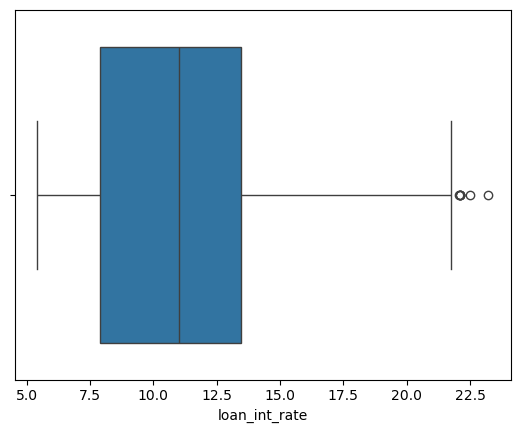

In [8]:
sns.boxplot(x=df['loan_int_rate'])

In [9]:
median_value = df['loan_int_rate'].median()

def replace_outliers_with_median(val):
    Q1 = df['loan_int_rate'].quantile(0.25)
    Q3 = df['loan_int_rate'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if val < lower_bound or val > upper_bound:
        return median_value
    else:
        return val

df['loan_int_rate'] = df['loan_int_rate'].apply(replace_outliers_with_median)

<Axes: xlabel='loan_int_rate'>

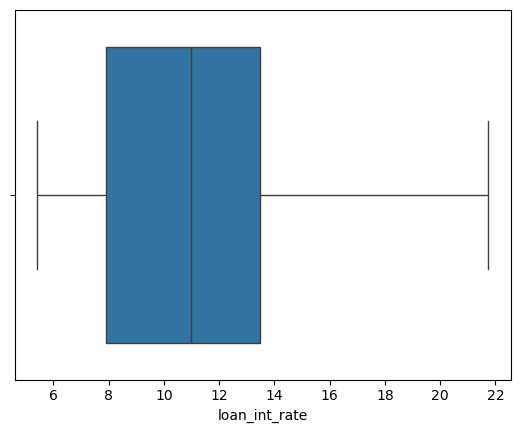

In [11]:
sns.boxplot(x=df['loan_int_rate'])

<Axes: xlabel='person_emp_length'>

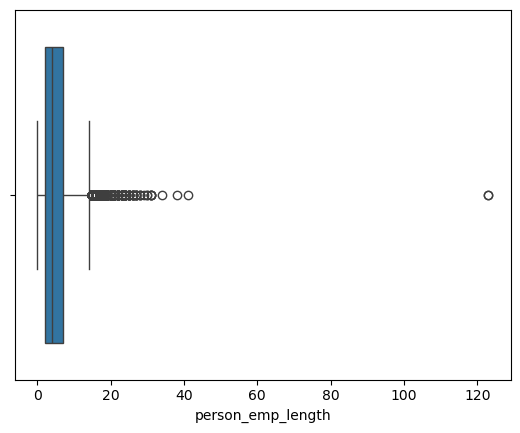

In [11]:
sns.boxplot(x=df['person_emp_length'])

In [12]:
median_value = df['person_emp_length'].median()

def replace_outliers_with_median(val):
    Q1 = df['person_emp_length'].quantile(0.25)
    Q3 = df['person_emp_length'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if val < lower_bound or val > upper_bound:
        return median_value
    else:
        return val

df['person_emp_length'] = df['person_emp_length'].apply(replace_outliers_with_median)

<Axes: xlabel='person_emp_length'>

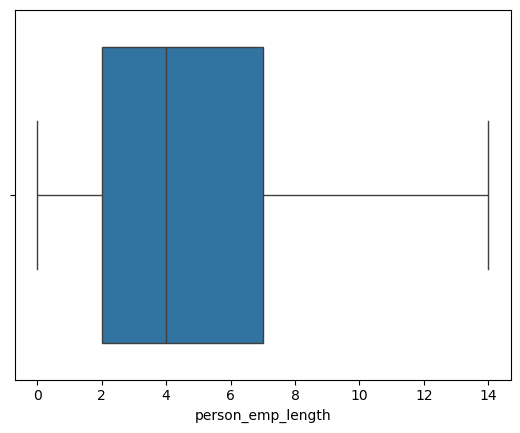

In [13]:
sns.boxplot(x=df['person_emp_length'])

<Axes: xlabel='person_age'>

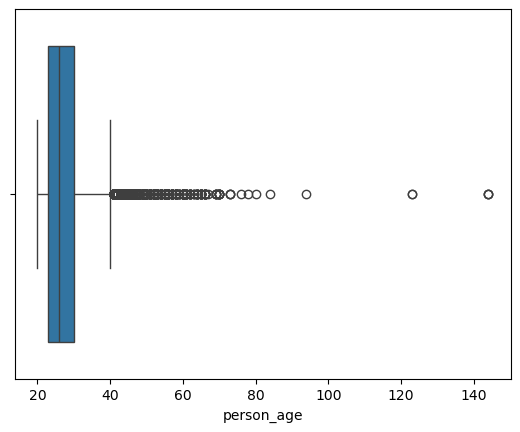

In [14]:
sns.boxplot(x=df['person_age'])

In [15]:
median_value = df['person_age'].median()

def replace_outliers_with_median(val):
    Q1 = df['person_age'].quantile(0.25)
    Q3 = df['person_age'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if val < lower_bound or val > upper_bound:
        return median_value
    else:
        return val

df['person_age'] = df['person_age'].apply(replace_outliers_with_median)

<Axes: xlabel='person_age'>

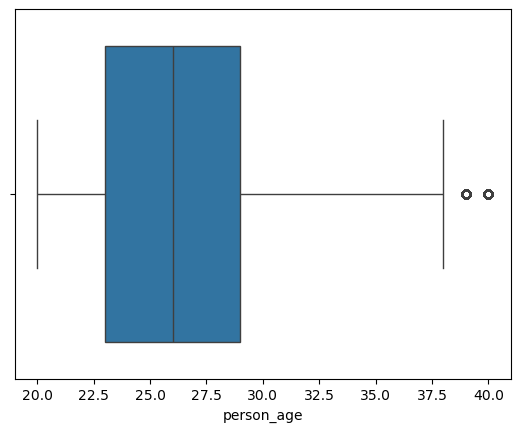

In [16]:
sns.boxplot(x=df['person_age'])

<Axes: xlabel='person_income'>

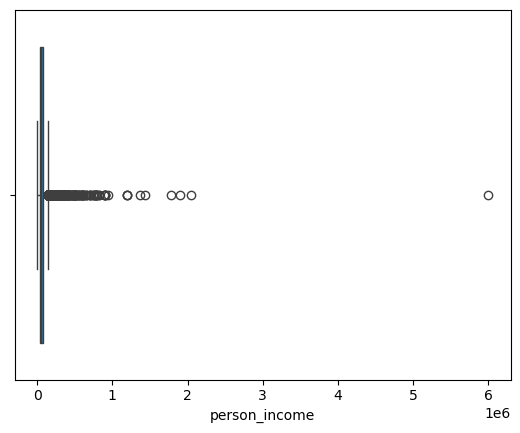

In [17]:
sns.boxplot(x=df['person_income'])

In [18]:
median_value = df['person_income'].median()

def replace_outliers_with_median(val):
    Q1 = df['person_income'].quantile(0.25)
    Q3 = df['person_income'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if val < lower_bound or val > upper_bound:
        return median_value
    else:
        return val

df['person_income'] = df['person_income'].apply(replace_outliers_with_median)

<Axes: xlabel='person_income'>

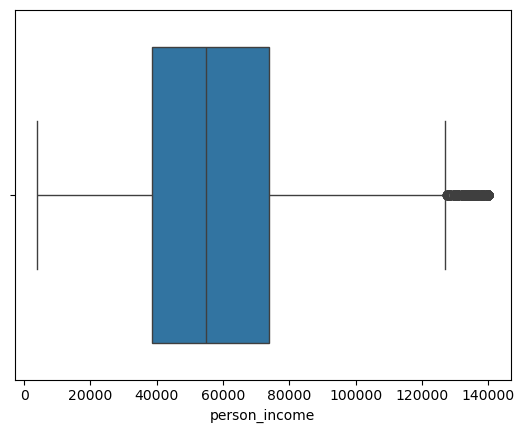

In [19]:
sns.boxplot(x=df['person_income'])

<Axes: xlabel='loan_amnt'>

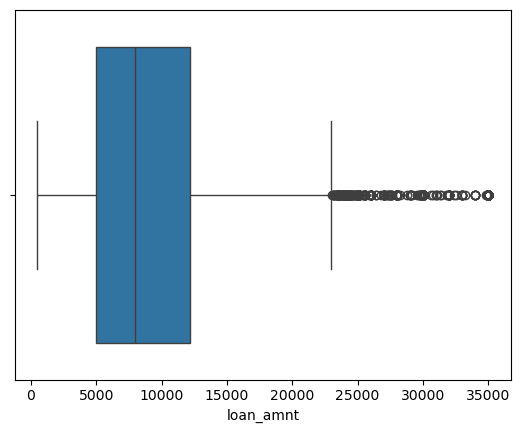

In [20]:
sns.boxplot(x=df['loan_amnt'])

In [21]:
median_value = df['loan_amnt'].median()

def replace_outliers_with_median(val):
    Q1 = df['loan_amnt'].quantile(0.25)
    Q3 = df['loan_amnt'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if val < lower_bound or val > upper_bound:
        return median_value
    else:
        return val

df['loan_amnt'] = df['loan_amnt'].apply(replace_outliers_with_median)

<Axes: xlabel='loan_amnt'>

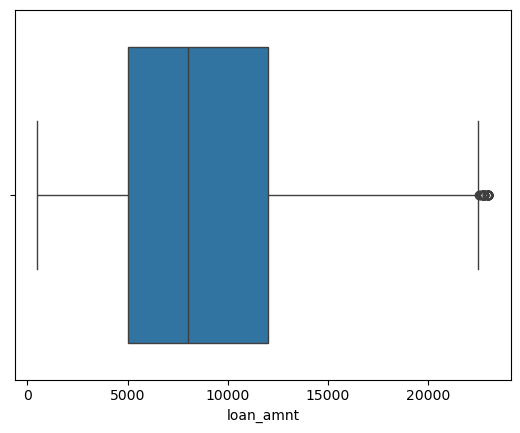

In [22]:
sns.boxplot(x=df['loan_amnt'])

<Axes: xlabel='loan_percent_income'>

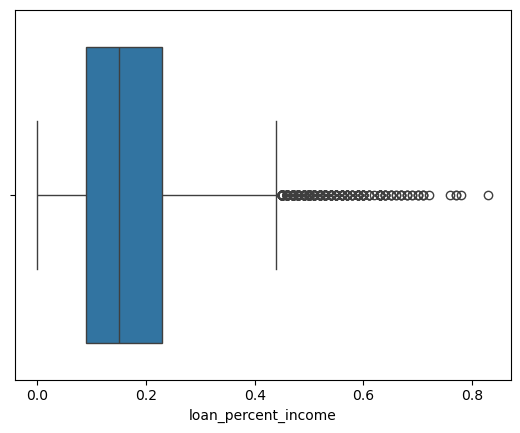

In [23]:
sns.boxplot(x=df['loan_percent_income'])

In [24]:
median_value = df['loan_percent_income'].median()

def replace_outliers_with_median(val):
    Q1 = df['loan_percent_income'].quantile(0.25)
    Q3 = df['loan_percent_income'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if val < lower_bound or val > upper_bound:
        return median_value
    else:
        return val

df['loan_percent_income'] = df['loan_percent_income'].apply(replace_outliers_with_median)

<Axes: xlabel='loan_percent_income'>

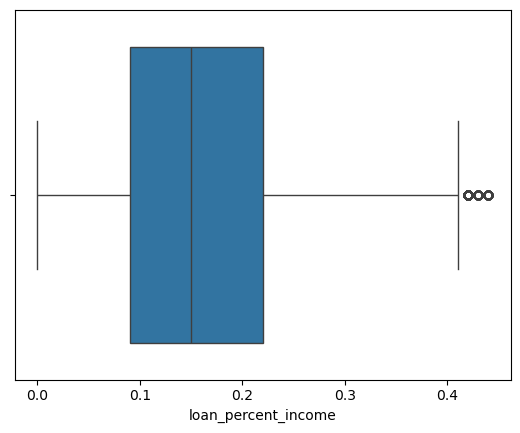

In [25]:
sns.boxplot(x=df['loan_percent_income'])

<Axes: xlabel='cb_person_cred_hist_length'>

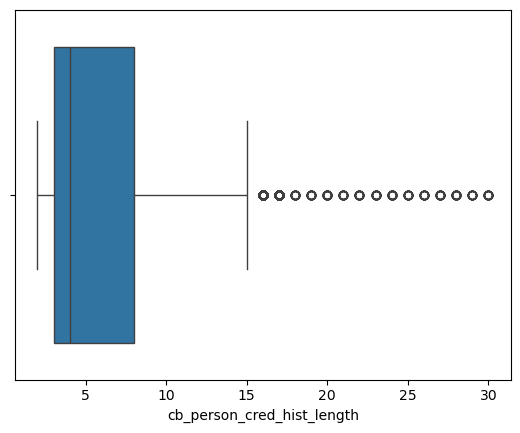

In [26]:
sns.boxplot(x=df['cb_person_cred_hist_length'])

In [27]:
median_value = df['cb_person_cred_hist_length'].median()

def replace_outliers_with_median(val):
    Q1 = df['cb_person_cred_hist_length'].quantile(0.25)
    Q3 = df['cb_person_cred_hist_length'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if val < lower_bound or val > upper_bound:
        return median_value
    else:
        return val

df['cb_person_cred_hist_length'] = df['cb_person_cred_hist_length'].apply(replace_outliers_with_median)

<Axes: xlabel='cb_person_cred_hist_length'>

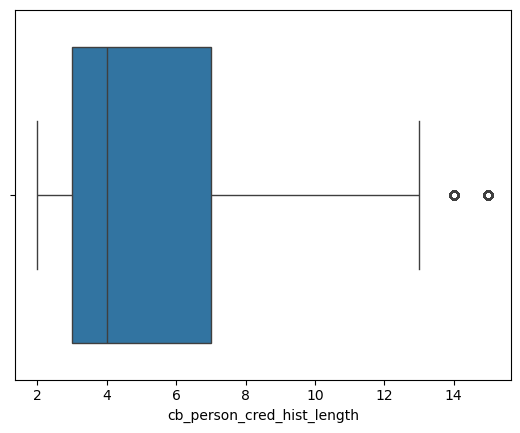

In [28]:
sns.boxplot(x=df['cb_person_cred_hist_length'])

### Duplicate Removal

In [29]:
df.duplicated().sum()

154

In [30]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [31]:
df.duplicated().sum()

0

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32427 entries, 0 to 32426
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32427 non-null  float64
 1   person_income               32427 non-null  float64
 2   person_home_ownership       32427 non-null  object 
 3   person_emp_length           32427 non-null  float64
 4   loan_intent                 32427 non-null  object 
 5   loan_grade                  32427 non-null  object 
 6   loan_amnt                   32427 non-null  float64
 7   loan_int_rate               32427 non-null  float64
 8   loan_status                 32427 non-null  int64  
 9   loan_percent_income         32427 non-null  float64
 10  cb_person_default_on_file   32427 non-null  object 
 11  cb_person_cred_hist_length  32427 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 3.0+ MB


In [33]:
df.to_csv('credit_risk_dataset1.csv')